### Importación de datos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [15]:

# Calcular ingresos por tienda
tienda ["Total_ingreso"] = tienda['Precio']
tienda2 ["Total_ingreso"] = tienda2['Precio']
tienda3 ["Total_ingreso"]= tienda3['Precio']
tienda4 ["Total_ingreso"] = tienda4['Precio']

In [16]:
#imprimir ingresos por tienda
print ("Total ingresos tienda 1: ", tienda ["Total_ingreso"].sum())
print ("Total ingresos tienda 2: ", tienda2 ["Total_ingreso"].sum())
print ("Total ingresos tienda 3: ", tienda3 ["Total_ingreso"].sum())
print ("Total ingresos tienda 4: ", tienda4 ["Total_ingreso"].sum())

Total ingresos tienda 1:  1150880400.0
Total ingresos tienda 2:  1116343500.0
Total ingresos tienda 3:  1098019600.0
Total ingresos tienda 4:  1038375700.0


# 2. Ventas por categoría

In [22]:

#Agrupar por categoría y contar productos vendidos
ventas_tienda = tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_tienda2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_tienda3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_tienda4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)



In [24]:
# Mostrar las categorías más populares por tienda
print("Categorías más populares - Tienda 1:\n", ventas_tienda)
print("\nCategorías más populares - Tienda 2:\n", ventas_tienda2)
print("\nCategorías más populares - Tienda 3:\n", ventas_tienda3)
print("\nCategorías más populares - Tienda 4:\n", ventas_tienda4)

Categorías más populares - Tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Categorías más populares - Tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Categorías más populares - Tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Categorías más populares - Tien

# 3. Calificación promedio de la tienda


In [27]:
# Calcular promedio de calificaciones por tienda
promedio_tienda = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()



In [28]:

# Mostrar resultados
print(f"Calificación promedio - Tienda: {promedio_tienda:.2f}")
print(f"Calificación promedio - Tienda 2: {promedio_tienda2:.2f}")
print(f"Calificación promedio - Tienda 3: {promedio_tienda3:.2f}")
print(f"Calificación promedio - Tienda 4: {promedio_tienda4:.2f}")

Calificación promedio - Tienda: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [34]:
import matplotlib.pyplot as plt

def mostrar_top_bottom_productos(df, nombre_tienda):
    # Contar ventas por producto
    ventas = df['Producto'].value_counts()

    # Seleccionar top 3 y bottom 3
    top_3 = ventas.head(3)
    bottom_3 = ventas.tail(3)

    # Combinar
    resumen = pd.concat([top_3, bottom_3])

    # Colores: verde para top, rojo para bottom
    colores = ['green'] * 3 + ['red'] * 3

    # Graficar
    resumen.plot(kind='bar', color=colores, figsize=(8,5))
    plt.title(f"Top y Bottom 3 productos vendidos - {nombre_tienda}")
    plt.ylabel("Cantidad de ventas")
    plt.xlabel("Producto")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


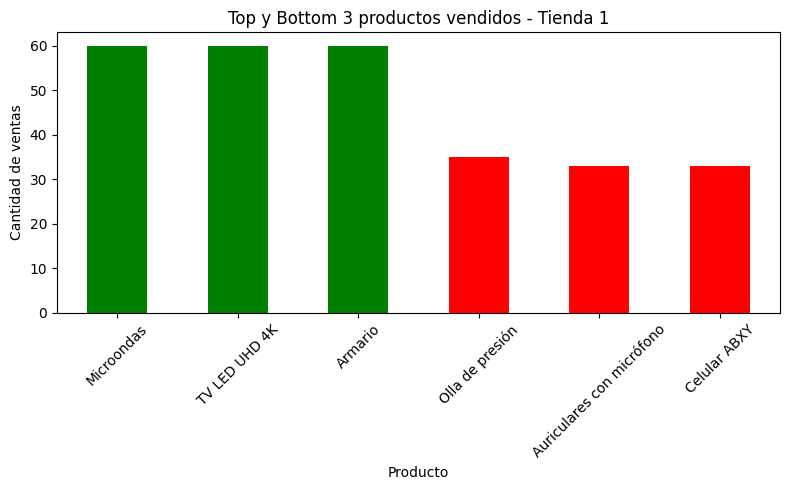

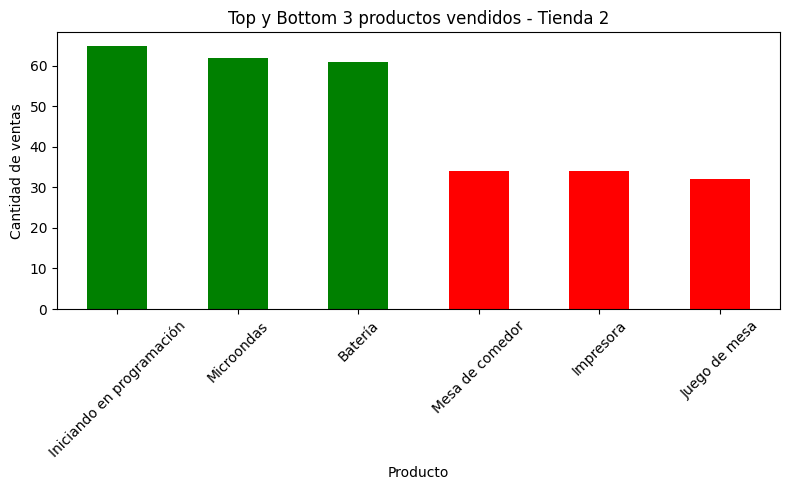

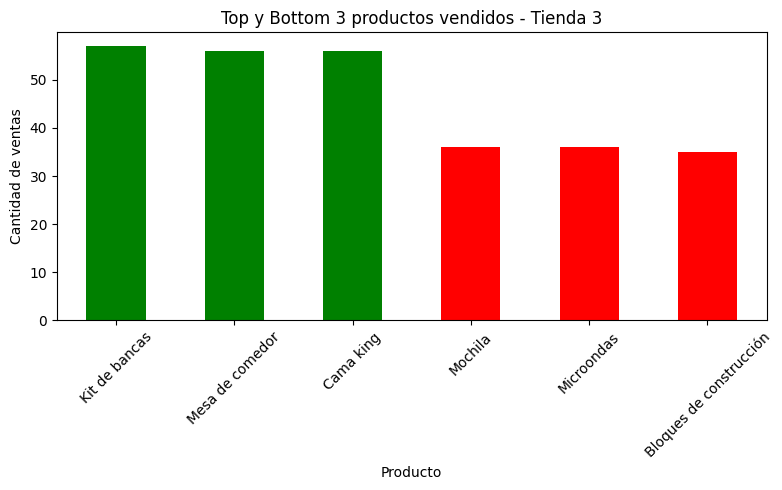

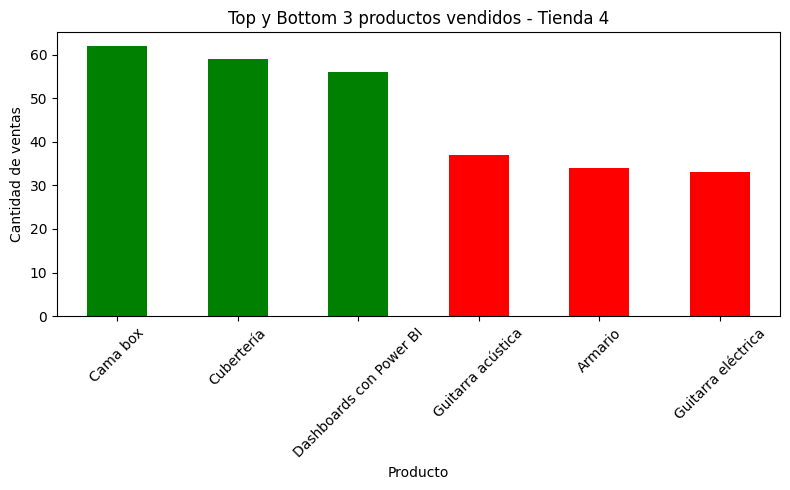

In [35]:
mostrar_top_bottom_productos(tienda, "Tienda 1")
mostrar_top_bottom_productos(tienda2, "Tienda 2")
mostrar_top_bottom_productos(tienda3, "Tienda 3")
mostrar_top_bottom_productos(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [36]:
# Calcular promedio de costo de envío por tienda
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

In [37]:
# Mostrar resultados
print(f"Costo de envío promedio - Tienda 1: ${envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio - Tienda 2: ${envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio - Tienda 3: ${envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio - Tienda 4: ${envio_promedio_tienda4:.2f}")

Costo de envío promedio - Tienda 1: $26018.61
Costo de envío promedio - Tienda 2: $25216.24
Costo de envío promedio - Tienda 3: $24805.68
Costo de envío promedio - Tienda 4: $23459.46


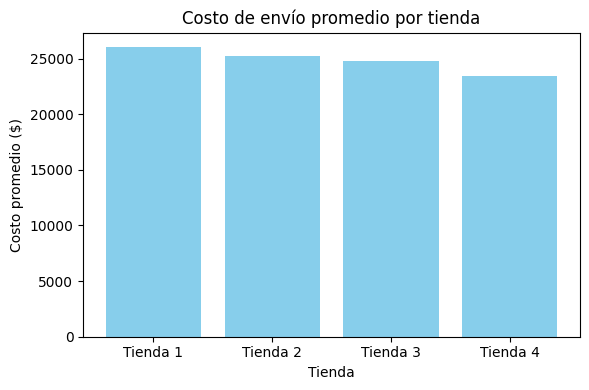

In [38]:
import matplotlib.pyplot as plt

# Datos
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = [
    envio_promedio_tienda1,
    envio_promedio_tienda2,
    envio_promedio_tienda3,
    envio_promedio_tienda4
]

# Gráfico
plt.figure(figsize=(6,4))
plt.bar(nombres_tiendas, promedios_envio, color='skyblue')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

**Introducción**

Este informe tiene como objetivo determinar cuál de las cuatro tiendas disponibles representa la mejor opción para que el Sr. Juan comercialice sus productos. Para ello, se realizó un análisis detallado de los siguientes factores:
Ingresos totales por tienda
Categorías más y menos vendidas
Calificaciones promedio de los clientes
Productos más y menos vendidos
Costo de envío promedio
A través de visualizaciones y métricas clave, se busca tomar una decisión informada que maximice el potencial comercial del Sr. Juan.

**Desarrollo**

**1. Ingresos Totales**

Los ingresos acumulados por tienda fueron:


Tienda 1	$1,150,880,400

Tienda 2	$1,116,343,500

Tienda 3	$1,098,019,600

Tienda 4	$1,038,375,700

*Tienda 1 lidera en facturación, lo que indica una alta rotación de productos y fuerte presencia comercial.*

**2. Categorías más y menos vendidas**

**Las tres categorías más vendidas en todas las tiendas fueron:**


*   Muebles
*   Electrónicos
*   Juguetes

**Las menos vendidas fueron:**


*   Instrumentos musicales
*   Libros
*   Artículos para el hogar


*Esto sugiere que el Sr. Juan debería enfocarse en las categorías líderes si busca mayor volumen de ventas.*

**3. Calificación promedio de los clientes**

Tienda	Calificación promedio:

Tienda 1	3.98

Tienda 2	4.04

Tienda 3	4.05

Tienda 4	4.00

*Tienda 3 destaca por tener la mejor satisfacción del cliente, lo que puede reflejar buena atención, calidad o logística.*

**4. Productos más y menos vendidos**

Se generaron gráficos para cada tienda mostrando los tres productos más vendidos (en verde) y los tres menos vendidos (en rojo). Estos permiten identificar qué productos tienen mayor potencial y cuáles podrían evitarse.

*La variedad de productos exitosos en Tienda 1 y Tienda 3 sugiere una buena segmentación del mercado.*

**5. Costo de envío promedio**

Tienda	Costo de envío promedio

Tienda 1	$26,018.61

Tienda 2	$25,216.24

Tienda 3	$24,805.68

Tienda 4	$23,459.46

*Tienda 4 tiene el costo de envío más bajo, lo que podría mejorar márgenes, aunque sus ingresos son los más bajos.*

**Conclusión y recomendación**

Tras analizar todos los factores, se recomienda que el Sr. Juan comercialice sus productos en **Tienda 1**.

Esta tienda:

Tiene el mayor ingreso total, lo que indica fuerte demanda.

Presenta categorías líderes bien posicionadas.

Ofrece una variedad de productos exitosos.

Aunque su calificación promedio no es la más alta, se mantiene competitiva.

Si el Sr. Juan priorizara la satisfacción del cliente por encima del volumen de ventas, Tienda 3 sería una alternativa viable. Por otro lado, Tienda 4, aunque con menor costo de envío, no presenta ventajas significativas en ventas ni en calificaciones.


Tienda 1 por su liderazgo en ingresos, diversidad de productos exitosos y posicionamiento en categorías clave.